In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/Classification/heart.csv"
dataset = pd.read_csv(url, error_bad_lines=False, header=0, index_col=None)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 - Is there any missing value across columns of data?__

In [18]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 - __Ratio of binary class labels present in data__

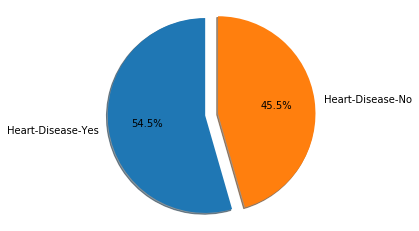

In [3]:
exp_vals = [dataset.target.value_counts()[1], dataset.target.value_counts()[0]]
exp_labels = ["Heart-Disease-Yes","Heart-Disease-No"]
plt.pie(exp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=1.5,explode=[0,0.2],counterclock=True, startangle=90)
plt.axis("equal")
plt.show()

 - __Left Chart: How age is distributed acorss gender for those who have a Heart Disease?__
 - __Right Chart: How age is distributed acorss gender for those who do not have a Heart Disease?__

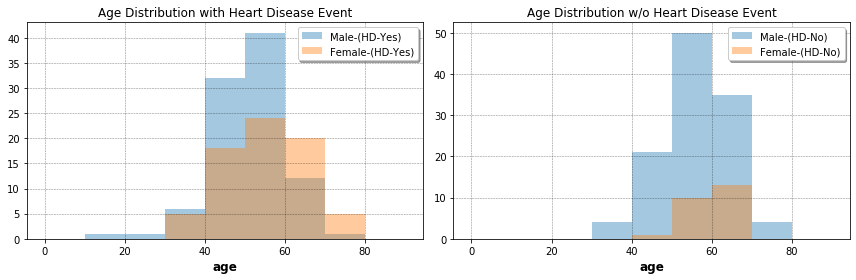

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(dataset.query("sex==1 and target==1").age.values, ax=ax[0], hist=True, kde=False,label=["Male-(HD-Yes)"], bins=[0,10,30,40,50,60,70,80,90])
sns.distplot(dataset.query("sex==0 and target==1").age.values, ax=ax[0], hist=True, kde=False,label=["Female-(HD-Yes)"], bins=[0,10,30,40,50,60,70,80,90])
ax[0].legend(loc='best', shadow=True,fontsize='medium')
ax[0].set_xlabel('age', fontsize=12, weight='bold')
ax[0].set_title('Age Distribution with Heart Disease Event', fontsize=12)
ax[0].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)


sns.distplot(dataset.query("sex==1 and target==0").age.values, ax=ax[1], hist=True, kde=False,label=["Male-(HD-No)"], bins=[0,10,30,40,50,60,70,80,90])
sns.distplot(dataset.query("sex==0 and target==0").age.values, ax=ax[1], hist=True, kde=False,label=["Female-(HD-No)"], bins=[0,10,30,40,50,60,70,80,90])
ax[1].legend(loc='best', shadow=True,fontsize='medium')
ax[1].set_xlabel('age', fontsize=12, weight='bold')
ax[1].set_title('Age Distribution w/o Heart Disease Event', fontsize=12)
ax[1].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)

fig.tight_layout()
plt.show()

 - __Pie1(Clockwise): What is the percentage of chest pain types in Males with Heart Disease?__
 - __Pie2(Clockwise): What is the percentage of chest pain types in Females with Heart Disease?__
 - __Pie3(Clockwise): What is the percentage of chest pain types in Males w/o Heart Disease?__
 - __Pie4(Clockwise): What is the percentage of chest pain types in Females w/o Heart Disease?__

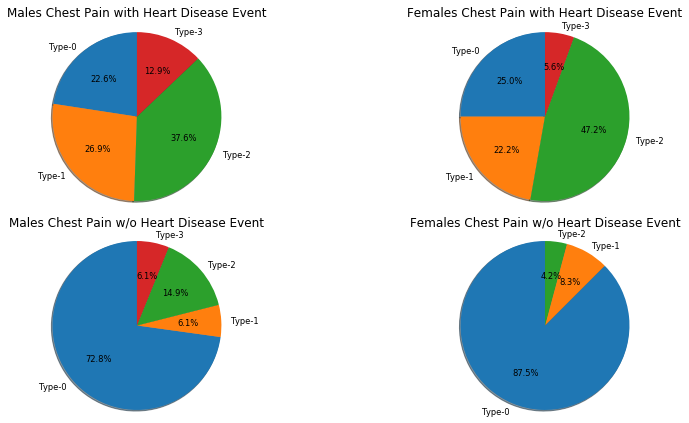

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
y = pd.Series(['Type-0','Type-1','Type-2','Type-3'])
x = pd.Series(dataset.query("sex==1 and target==1").cp.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[0][0].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'})
ax[0][0].set_title('Males Chest Pain with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==1").cp.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[0][1].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'})
ax[0][1].set_title('Females Chest Pain with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==1 and target==0").cp.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[1][0].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'})
ax[1][0].set_title('Males Chest Pain w/o Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==0").cp.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[1][1].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'})
ax[1][1].set_title('Females Chest Pain w/o Heart Disease Event', fontsize=12, pad=30)

fig.tight_layout()
plt.show()

 - __Is Chest Pain of Type 3 occuring beyond 40 to 60 years of age for patients with Heart Disease?__

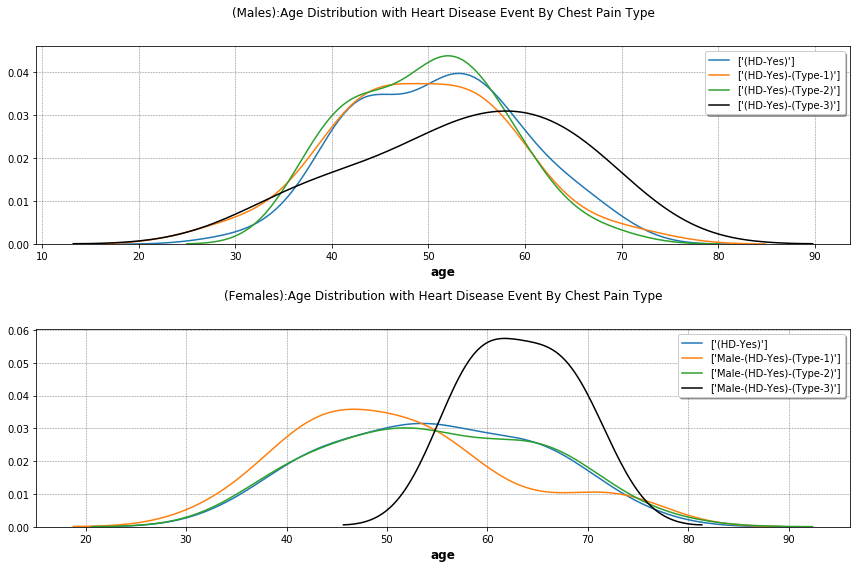

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sns.distplot(dataset.query("sex==1 and target==1").age.values, hist=False, ax=ax[0], label=["(HD-Yes)"])
sns.distplot(dataset.query("sex==1 and target==1 and cp==1").age.values, hist=False, ax=ax[0], label=["(HD-Yes)-(Type-1)"])
sns.distplot(dataset.query("sex==1 and target==1 and cp==2").age.values, hist=False, ax=ax[0], label=["(HD-Yes)-(Type-2)"])
sns.distplot(dataset.query("sex==1 and target==1 and cp==3").age.values, hist=False, ax=ax[0], label=["(HD-Yes)-(Type-3)"], color='black')
ax[0].legend(loc='best', shadow=True,fontsize='medium')
ax[0].set_xlabel('age', fontsize=12, weight='bold')
ax[0].set_title('(Males):Age Distribution with Heart Disease Event By Chest Pain Type', fontsize=12, pad=30)
ax[0].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)

sns.distplot(dataset.query("sex==0 and target==1").age.values, hist=False, ax=ax[1], label=["(HD-Yes)"])
sns.distplot(dataset.query("sex==0 and target==1 and cp==1").age.values, hist=False, ax=ax[1], label=["Male-(HD-Yes)-(Type-1)"])
sns.distplot(dataset.query("sex==0 and target==1 and cp==2").age.values, hist=False, ax=ax[1], label=["Male-(HD-Yes)-(Type-2)"])
sns.distplot(dataset.query("sex==0 and target==1 and cp==3").age.values, hist=False, ax=ax[1], label=["Male-(HD-Yes)-(Type-3)"],color='black')
ax[1].legend(loc='best', shadow=True,fontsize='medium')
ax[1].set_xlabel('age', fontsize=12, weight='bold')
ax[1].set_title('(Females):Age Distribution with Heart Disease Event By Chest Pain Type', fontsize=12, pad=30)
ax[1].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)

fig.tight_layout()
plt.show()

 - __Do patients with Heart Disease have a different blood pressure compared to patients without Heart Disease?__

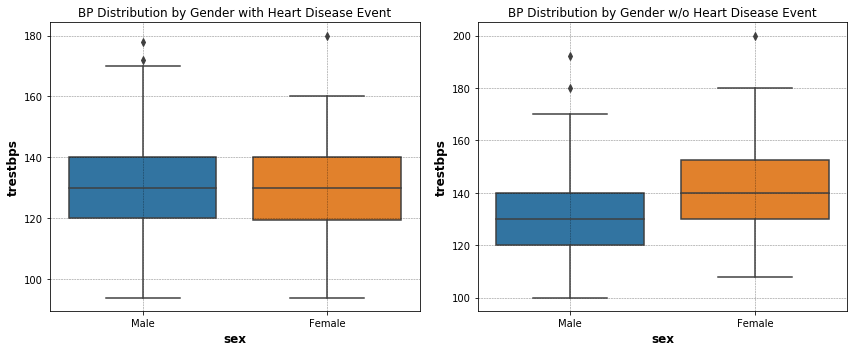

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="sex", y="trestbps", data=dataset.query("target==1"), dodge=True, ax=ax[0], order=[1, 0])
ax[0].set_xlabel("sex", fontsize=12, weight='bold')
ax[0].set_ylabel('trestbps', fontsize=12, weight='bold')
ax[0].set_title('BP Distribution by Gender with Heart Disease Event', fontsize=12)
ax[0].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax[0].set_xticklabels(['Male', 'Female'], fontsize=10)

sns.boxplot(x="sex", y="trestbps", data=dataset.query("target==0"), dodge=True, ax=ax[1], order=[1,0])
ax[1].set_xlabel("sex", fontsize=12, weight='bold')
ax[1].set_ylabel('trestbps', fontsize=12, weight='bold')
ax[1].set_title('BP Distribution by Gender w/o Heart Disease Event', fontsize=12)
ax[1].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax[1].set_xticklabels(['Male', 'Female'], fontsize=10)

fig.tight_layout()
plt.show()

 - __Do patients with Heart Disease have a different cholesterol compared to patients without Heart Disease?__

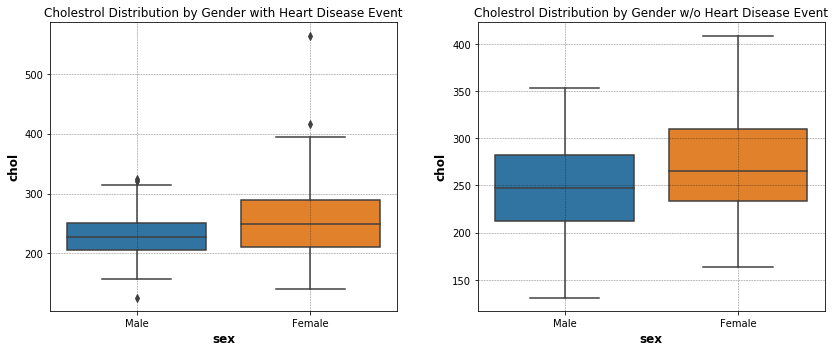

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="sex", y="chol", data=dataset.query("target==1"), dodge=True, ax=ax[0], order=[1, 0])
ax[0].set_xlabel("sex", fontsize=12, weight='bold')
ax[0].set_ylabel('chol', fontsize=12, weight='bold')
ax[0].set_title('Cholestrol Distribution by Gender with Heart Disease Event', fontsize=12)
ax[0].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax[0].set_xticklabels(['Male', 'Female'], fontsize=10)

sns.boxplot(x="sex", y="chol", data=dataset.query("target==0"), dodge=True, ax=ax[1], order=[1,0])
ax[1].set_xlabel("sex", fontsize=12, weight='bold')
ax[1].set_ylabel('chol', fontsize=12, weight='bold')
ax[1].set_title('Cholestrol Distribution by Gender w/o Heart Disease Event', fontsize=12)
ax[1].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax[1].set_xticklabels(['Male', 'Female'], fontsize=10)

fig.tight_layout()
plt.show()

 - __Is Age moving in same direction as Cholesterol or Blood Pressure for patients with or without Heart Disease?__

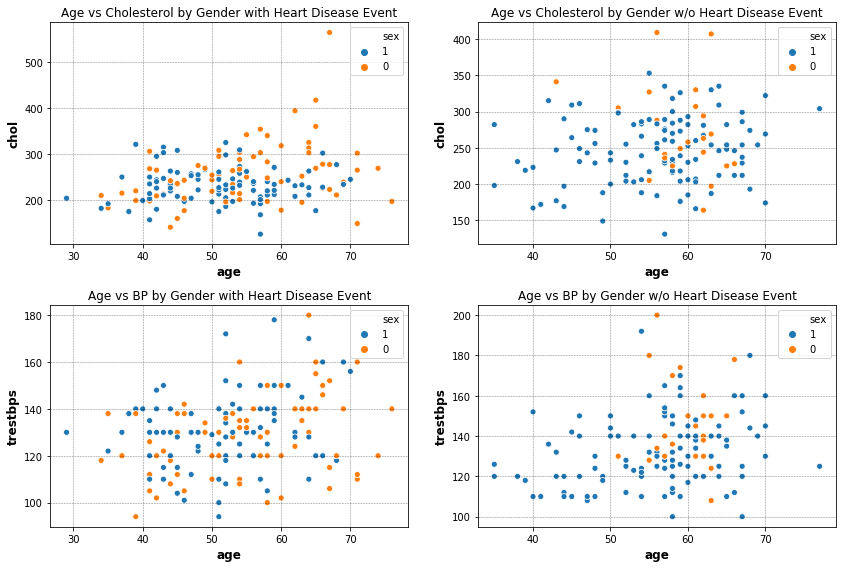

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(x="age", y="chol", data=dataset.query("target==1"), hue="sex", ax=ax[0][0], legend="full", hue_order=[1,0])
ax[0][0].set_xlabel("age", fontsize=12, weight='bold')
ax[0][0].set_ylabel('chol', fontsize=12, weight='bold')
ax[0][0].set_title('Age vs Cholesterol by Gender with Heart Disease Event', fontsize=12)
ax[0][0].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)


sns.scatterplot(x="age", y="chol", data=dataset.query("target==0"), hue="sex", ax=ax[0][1], legend="full", hue_order=[1,0])
ax[0][1].set_xlabel("age", fontsize=12, weight='bold')
ax[0][1].set_ylabel('chol', fontsize=12, weight='bold')
ax[0][1].set_title('Age vs Cholesterol by Gender w/o Heart Disease Event', fontsize=12)
ax[0][1].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)

sns.scatterplot(x="age", y="trestbps", data=dataset.query("target==1"), hue="sex", ax=ax[1][0], legend="full", hue_order=[1,0])
ax[1][0].set_xlabel("age", fontsize=12, weight='bold')
ax[1][0].set_ylabel('trestbps', fontsize=12, weight='bold')
ax[1][0].set_title('Age vs BP by Gender with Heart Disease Event', fontsize=12)
ax[1][0].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)

sns.scatterplot(x="age", y="trestbps", data=dataset.query("target==0"), hue="sex", ax=ax[1][1], legend="full", hue_order=[1,0])
ax[1][1].set_xlabel("age", fontsize=12, weight='bold')
ax[1][1].set_ylabel('trestbps', fontsize=12, weight='bold')
ax[1][1].set_title('Age vs BP by Gender w/o Heart Disease Event', fontsize=12)
ax[1][1].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
                   
fig.tight_layout()
plt.show()

 - __Correlation matrix of numeric attributes for patients with & w/o Heart Disease__

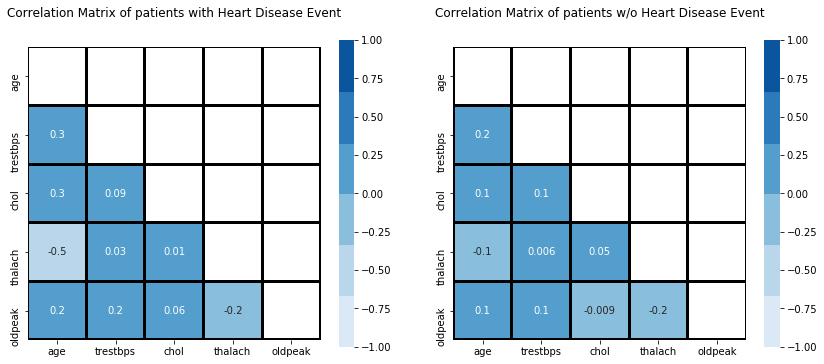

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cormat = dataset.query("target==1")[["age","trestbps","chol","thalach","oldpeak"]].corr()
sns.heatmap(cormat, 
            cmap=sns.color_palette("Blues"),
            fmt='.1g',
            annot = True,
            vmin=-1, vmax=1, center= 0,
            linewidths=2, linecolor='black',
            square=True,
            mask=np.triu(cormat),
            ax=ax[0])
ax[0].set_title('Correlation Matrix of patients with Heart Disease Event', fontsize=12, pad=30)

cormat = dataset.query("target==0")[["age","trestbps","chol","thalach","oldpeak"]].corr()
sns.heatmap(cormat, 
            cmap=sns.color_palette("Blues"),
            fmt='.1g',
            annot = True,
            vmin=-1, vmax=1, center= 0,
            linewidths=2, linecolor='black',
            square=True,
            mask=np.triu(cormat),
            ax=ax[1])
ax[1].set_title('Correlation Matrix of patients w/o Heart Disease Event', fontsize=12, pad=30)

fig.tight_layout()
plt.show()

 - __Predictive Power Score open sourced by Florian Wetschoreck__

In [11]:
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")

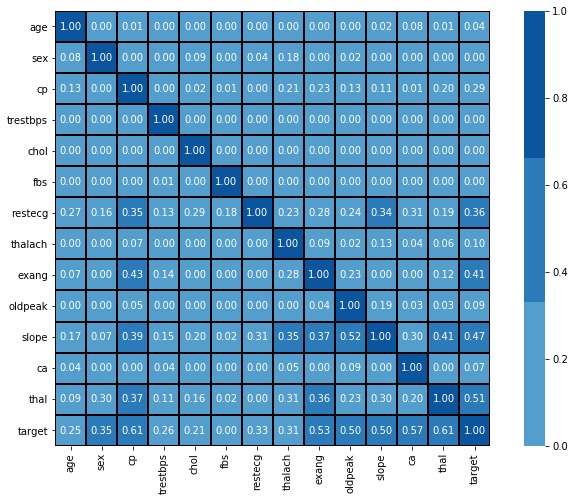

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(pps.matrix(dataset), 
            cmap=sns.color_palette("Blues"),
            fmt='.2f',
            annot = True,
            vmin=0, vmax=1, center= 0,
            linewidths=1, linecolor='black',
            square=True)

 - __Pie1(Clockwise): What is the percentage of thal types in Males with Heart Disease?__
 - __Pie2(Clockwise): What is the percentage of thal types in Females with Heart Disease?__
 - __Pie3(Clockwise): What is the percentage of thal types in Males w/o Heart Disease?__
 - __Pie4(Clockwise): What is the percentage of thal types in Females w/o Heart Disease?__

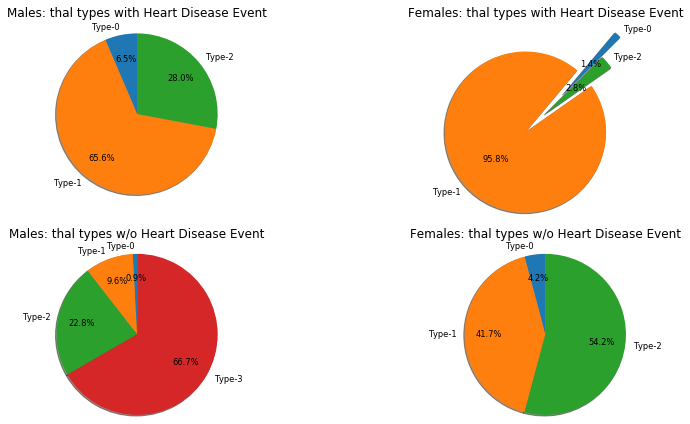

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
y = pd.Series(['Type-0','Type-1','Type-2','Type-3'])
x = pd.Series(dataset.query("sex==1 and target==1").thal.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[0][0].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'},pctdistance=0.70)
ax[0][0].set_title('Males: thal types with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==1").thal.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[0][1].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=45,textprops={'size': 'smaller'},pctdistance=0.50, explode=[0.5,0.5,0])
ax[0][1].set_title('Females: thal types with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==1 and target==0").thal.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[1][0].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'},pctdistance=0.70)
ax[1][0].set_title('Males: thal types w/o Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==0").thal.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[1][1].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'},pctdistance=0.70)
ax[1][1].set_title('Females: thal types w/o Heart Disease Event', fontsize=12, pad=30)

fig.tight_layout()
plt.show()

 - __Bar1(Clockwise): What is the percentage of ca types in Males with Heart Disease?__
 - __Bar2(Clockwise): What is the percentage of ca types in Females with Heart Disease?__
 - __Bar3(Clockwise): What is the percentage of ca types in Males w/o Heart Disease?__
 - __Bar4(Clockwise): What is the percentage of ca types in Females w/o Heart Disease?__

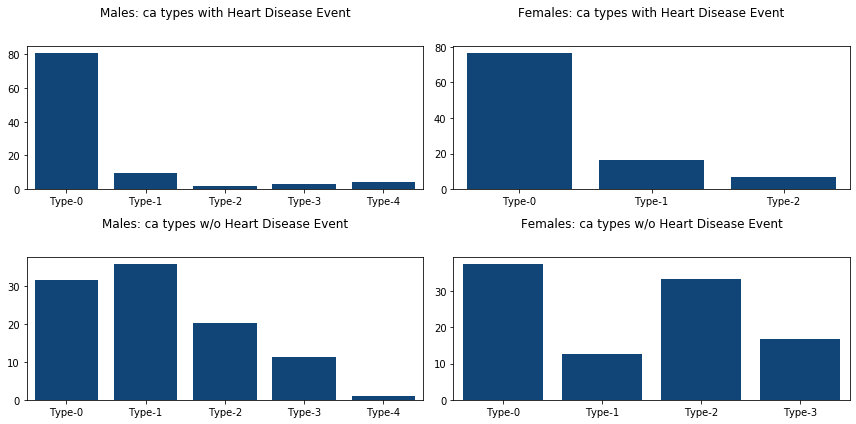

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
y = pd.Series(['Type-0','Type-1','Type-2','Type-3','Type-4'])
x = pd.Series(dataset.query("sex==1 and target==1").ca.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
xy['pct'] = round(xy[0]/xy[0].sum(axis=0)*100,2)
sns.barplot(y=xy['pct'].values, x=xy[1].values, color='#004488', ax=ax[0][0])
ax[0][0].set_title('Males: ca types with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==1").ca.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
xy['pct'] = round(xy[0]/xy[0].sum(axis=0)*100,2)
sns.barplot(y=xy['pct'].values, x=xy[1].values, color='#004488', ax=ax[0][1])
ax[0][1].set_title('Females: ca types with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==1 and target==0").ca.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
xy['pct'] = round(xy[0]/xy[0].sum(axis=0)*100,2)
sns.barplot(y=xy['pct'].values, x=xy[1].values, color='#004488', ax=ax[1][0])
ax[1][0].set_title('Males: ca types w/o Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==0").ca.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
xy['pct'] = round(xy[0]/xy[0].sum(axis=0)*100,2)
sns.barplot(y=xy['pct'].values, x=xy[1].values, color='#004488', ax=ax[1][1])
ax[1][1].set_title('Females: ca types w/o Heart Disease Event', fontsize=12, pad=30)

fig.tight_layout()
plt.show()

 - __Pie1(Clockwise): What is the percentage of exang types in Males with Heart Disease?__
 - __Pie2(Clockwise): What is the percentage of exang types in Females with Heart Disease?__
 - __Pie3(Clockwise): What is the percentage of exang types in Males w/o Heart Disease?__
 - __Pie4(Clockwise): What is the percentage of exang types in Females w/o Heart Disease?__

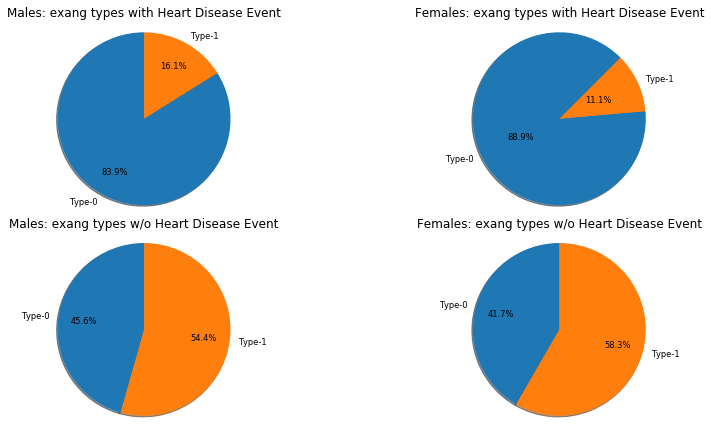

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
y = pd.Series(['Type-0','Type-1'])
x = pd.Series(dataset.query("sex==1 and target==1").exang.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[0][0].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'},pctdistance=0.70)
ax[0][0].set_title('Males: exang types with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==1").exang.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[0][1].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=45,textprops={'size': 'smaller'},pctdistance=0.50)
ax[0][1].set_title('Females: exang types with Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==1 and target==0").exang.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[1][0].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'},pctdistance=0.70)
ax[1][0].set_title('Males: exang types w/o Heart Disease Event', fontsize=12, pad=30)

x = pd.Series(dataset.query("sex==0 and target==0").exang.value_counts().sort_index().values)
xy = pd.concat([x,y], axis=1)
xy.fillna(value=0, axis=1,inplace=True)
xy = xy[xy[0]>0]
ax[1][1].pie(xy[0].values, labels=xy[1].values,shadow=True, autopct='%1.1f%%',radius=1.5,startangle=90,textprops={'size': 'smaller'},pctdistance=0.70)
ax[1][1].set_title('Females: exang types w/o Heart Disease Event', fontsize=12, pad=30)

fig.tight_layout()
plt.show()

 - __Do patients with Heart Disease have a different oldpeak values compared to patients without Heart Disease?__

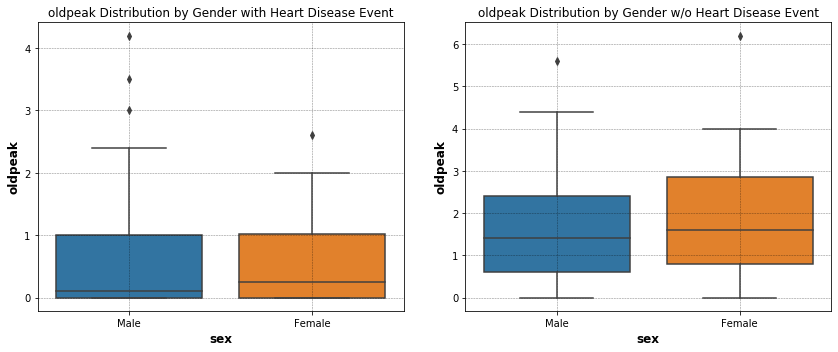

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="sex", y="oldpeak", data=dataset.query("target==1"), dodge=True, ax=ax[0], order=[1, 0])
ax[0].set_xlabel("sex", fontsize=12, weight='bold')
ax[0].set_ylabel('oldpeak', fontsize=12, weight='bold')
ax[0].set_title('oldpeak Distribution by Gender with Heart Disease Event', fontsize=12)
ax[0].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax[0].set_xticklabels(['Male', 'Female'], fontsize=10)

sns.boxplot(x="sex", y="oldpeak", data=dataset.query("target==0"), dodge=True, ax=ax[1], order=[1,0])
ax[1].set_xlabel("sex", fontsize=12, weight='bold')
ax[1].set_ylabel('oldpeak', fontsize=12, weight='bold')
ax[1].set_title('oldpeak Distribution by Gender w/o Heart Disease Event', fontsize=12)
ax[1].grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax[1].set_xticklabels(['Male', 'Female'], fontsize=10)

fig.tight_layout()
plt.show()